In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
sms = pd.read_csv('C:/Users/Abd ur Rehman/Desktop/Rimsha+ Samra project/Twtr data set/Twtr_data.csv', encoding='latin-1')
sms.head()

,r1,r2
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r1', ylabel='count'>

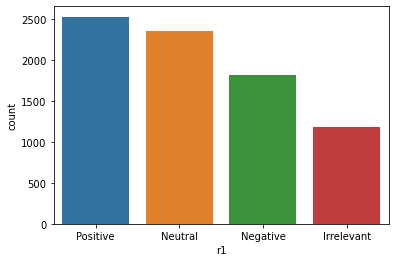

In [47]:
sns.countplot(sms['r1'])

In [48]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   r1      7860 non-null   object
 1   r2      7773 non-null   object
dtypes: object(2)
memory usage: 122.9+ KB


In [49]:
sms.isnull().sum()

r1     0
r2    87
dtype: int64

In [50]:
sms=sms.rename({'r1':'label','r2':'text'},axis=1)
sms.head()

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [51]:
sms = sms.dropna()  # Drop rows with missing values

In [52]:
ps=PorterStemmer()
def preprocess(x):
    x = x.lower()
    x = re.sub(r'[^0-9a-zA-Z]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    l = [item for item in x if item not in string.punctuation]
    processed=[ps.stem(i) for i in l if i not in stopwords.words('english')]
    return processed

In [54]:
X=sms['text']
y=sms['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import string

def model(model_name,X_train,y_train,X_test,y_test):
    pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess)),
    ('tfidf', TfidfTransformer()),
    ('model', model_name),
    ])
    pipeline.fit(X_train,y_train)

    preds=pipeline.predict(X_test)

    print (classification_report(y_test,preds))
    print (confusion_matrix(y_test,preds))
    print('Accuracy:', pipeline.score(X_test, y_test)*100)
    print("Training Score:",pipeline.score(X_train,y_train)*100)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test,preds)
    return score

In [56]:
mnb=model(MultinomialNB(),X_train,y_train,X_test,y_test)

C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       321
    Negative       0.00      0.00      0.00       545
     Neutral       0.55      0.37      0.44       701
    Positive       0.36      0.89      0.52       765

    accuracy                           0.40      2332
   macro avg       0.23      0.31      0.24      2332
weighted avg       0.29      0.40      0.30      2332

[[  0   0  55 266]
 [  0   0  67 478]
 [  0   0 259 442]
 [  0   0  87 678]]
Accuracy: 40.18010291595197
Training Score: 39.36776327880904


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

  Irrelevant       0.83      0.60      0.70       321
    Negative       0.81      0.70      0.75       545
     Neutral       0.83      0.82      0.82       701
    Positive       0.70      0.87      0.78       765

    accuracy                           0.78      2332
   macro avg       0.79      0.75      0.76      2332
weighted avg       0.78      0.78      0.77      2332

[[193  26  30  72]
 [ 14 381  45 105]
 [  5  23 572 101]
 [ 20  38  44 663]]
Accuracy: 77.57289879931389
Training Score: 98.58481896710164


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb=model(GradientBoostingClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

  Irrelevant       0.55      0.22      0.32       321
    Negative       0.56      0.37      0.45       545
     Neutral       0.60      0.56      0.58       701
    Positive       0.49      0.76      0.60       765

    accuracy                           0.54      2332
   macro avg       0.55      0.48      0.49      2332
weighted avg       0.55      0.54      0.52      2332

[[ 72  38  65 146]
 [ 16 204 109 216]
 [ 12  56 394 239]
 [ 30  68  87 580]]
Accuracy: 53.60205831903945
Training Score: 64.2712736629296


In [61]:
from sklearn.svm import SVC
svc=model(SVC(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

  Irrelevant       0.59      0.12      0.20       321
    Negative       0.56      0.22      0.32       545
     Neutral       0.58      0.50      0.53       701
    Positive       0.44      0.83      0.58       765

    accuracy                           0.49      2332
   macro avg       0.54      0.42      0.41      2332
weighted avg       0.53      0.49      0.45      2332

[[ 38  24  63 196]
 [  6 121 110 308]
 [  6  41 350 304]
 [ 14  30  85 636]]
Accuracy: 49.099485420240136
Training Score: 51.25895975004595


,Model,Accuracy_score
1,RF,0.775729
2,GBoost,0.536021
3,SVC,0.490995
0,MNB,0.401801


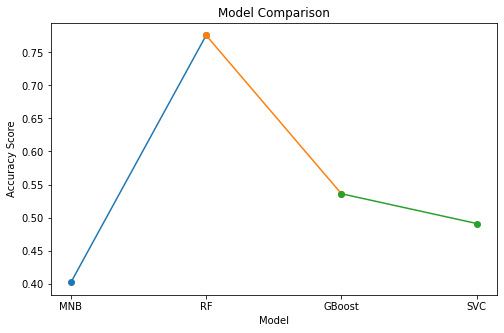

In [62]:
models = pd.DataFrame({
    'Model': ['MNB', 'RF', 'GBoost', 'SVC'],
    'Accuracy_score': [mnb, rf, gb,svc]
})

# Sort the dataframe by accuracy score
models = models.sort_values(by='Accuracy_score', ascending=False)
# Display the table
display(models)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot the line chart
# Set different colors for each line
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728']
for i in range(len(models) - 1):
    ax.plot([models['Model'][i], models['Model'][i+1]],
            [models['Accuracy_score'][i], models['Accuracy_score'][i+1]],
            marker='o', color=colors[i])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Comparison')

plt.show()

,Model,Accuracy_score
1,RF,0.775729
2,GBoost,0.536021
3,SVC,0.490995
0,MNB,0.401801


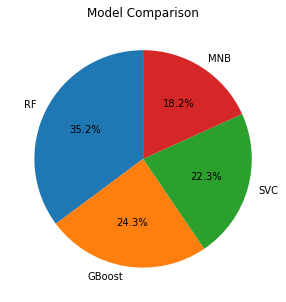

In [63]:
models = pd.DataFrame({
    'Model': ['MNB', 'RF', 'GBoost', 'SVC'],
    'Accuracy_score': [mnb, rf, gb, svc]
})

# Sort the dataframe by accuracy score
models = models.sort_values(by='Accuracy_score', ascending=False)
# Display the table
display(models)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot the pie chart
# Set different colors for each slice
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax.pie(models['Accuracy_score'], labels=models['Model'], colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Model Comparison')

plt.show()